In [1]:
!pip install requests matplotlib

Starting to collect ISS data...
Data point 1/100: Lat=45.00, Lon=-176.37, Time=2025-07-05 23:44:24
Data point 2/100: Lat=44.59, Lon=-175.40, Time=2025-07-05 23:44:37
Data point 3/100: Lat=44.23, Lon=-174.58, Time=2025-07-05 23:44:48
Data point 4/100: Lat=43.84, Lon=-173.71, Time=2025-07-05 23:45:00
Data point 5/100: Lat=43.47, Lon=-172.92, Time=2025-07-05 23:45:11
Data point 6/100: Lat=43.06, Lon=-172.06, Time=2025-07-05 23:45:23
Data point 7/100: Lat=42.64, Lon=-171.22, Time=2025-07-05 23:45:35
Data point 8/100: Lat=42.18, Lon=-170.32, Time=2025-07-05 23:45:48
Data point 9/100: Lat=41.75, Lon=-169.51, Time=2025-07-05 23:46:00
Data point 10/100: Lat=41.32, Lon=-168.70, Time=2025-07-05 23:46:12
Data point 11/100: Lat=40.91, Lon=-167.97, Time=2025-07-05 23:46:23
Data point 12/100: Lat=40.42, Lon=-167.13, Time=2025-07-05 23:46:36
Data point 13/100: Lat=40.01, Lon=-166.42, Time=2025-07-05 23:46:47
Data point 14/100: Lat=39.55, Lon=-165.66, Time=2025-07-05 23:46:59
Data point 15/100: Lat=39

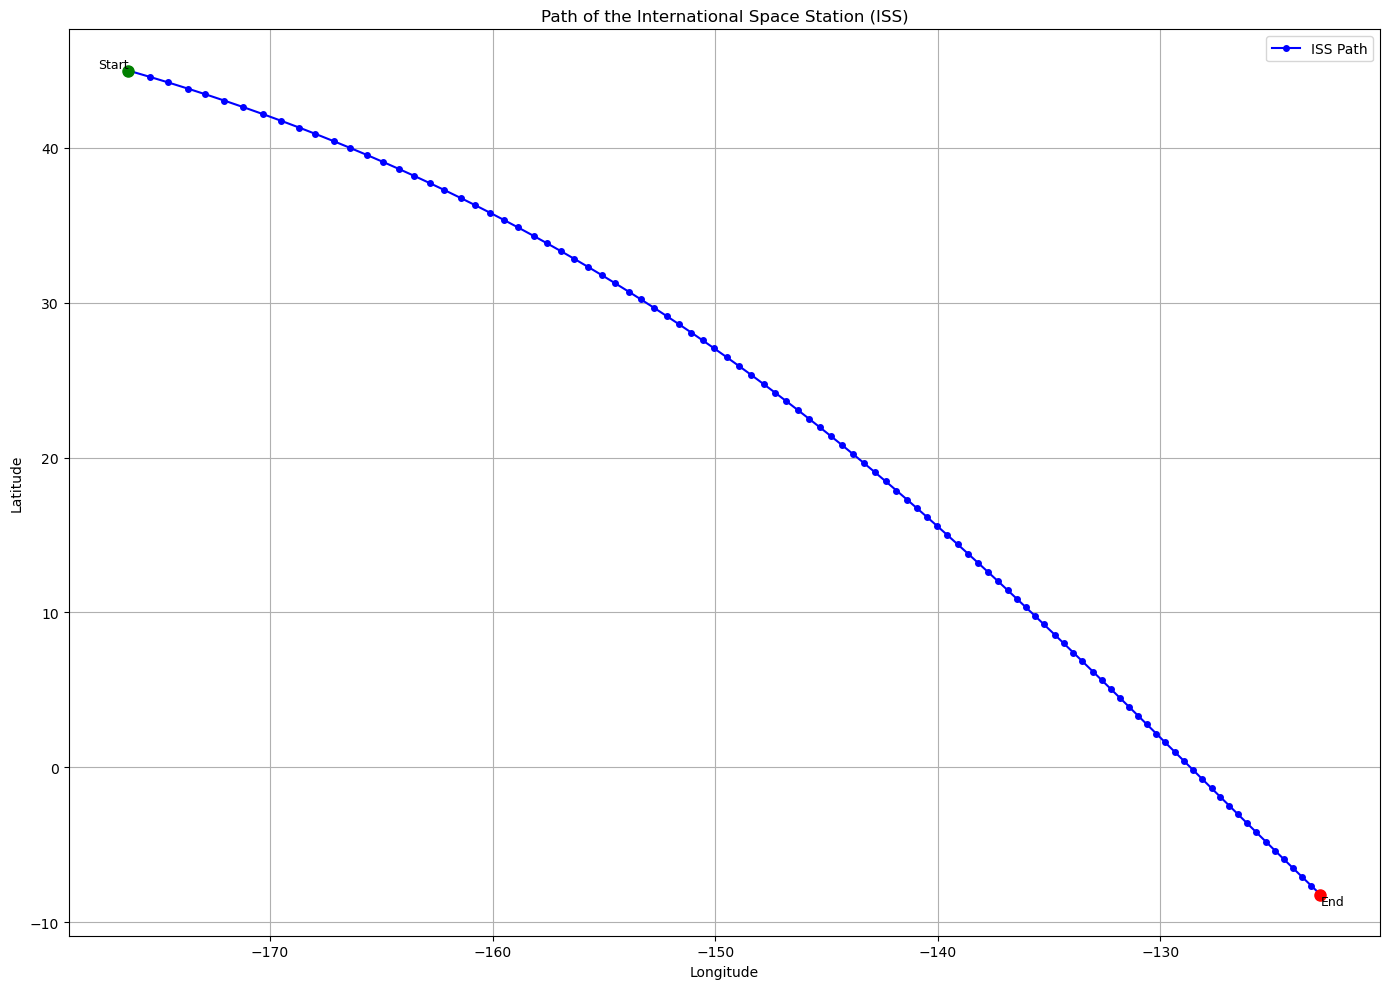


ISS path visualization generated successfully.


In [2]:
import requests
import matplotlib.pyplot as plt
import time
from datetime import datetime

ISS_API_URL = "https://api.wheretheiss.at/v1/satellites/25544"

latitudes = []
longitudes = []
timestamps = []

print("Starting to collect ISS data...")

for i in range(100):
    try:
        response = requests.get(ISS_API_URL)
        response.raise_for_status() 
        data = response.json()

        latitude = data['latitude']
        longitude = data['longitude']
        timestamp = data['timestamp'] 

        latitudes.append(latitude)
        longitudes.append(longitude)
        timestamps.append(datetime.fromtimestamp(timestamp)) 

        print(f"Data point {i+1}/100: Lat={latitude:.2f}, Lon={longitude:.2f}, Time={timestamps[-1]}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
    except KeyError as e:
        print(f"Error parsing JSON (missing key): {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

    time.sleep(10)

print("\nData collection complete. Generating plot...")

#---
plt.figure(figsize=(14, 10))
plt.plot(longitudes, latitudes, marker='o', linestyle='-', markersize=4, color='blue', label='ISS Path')
plt.title('Path of the International Space Station (ISS)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.tight_layout()

if latitudes and longitudes:
    plt.plot(longitudes[0], latitudes[0], 'go', markersize=8, label='Start Point')
    plt.plot(longitudes[-1], latitudes[-1], 'ro', markersize=8, label='End Point')
    plt.text(longitudes[0], latitudes[0], 'Start', ha='right', va='bottom', fontsize=9)
    plt.text(longitudes[-1], latitudes[-1], 'End', ha='left', va='top', fontsize=9)

plt.show()

print("\nISS path visualization generated successfully.")